# UFO Sightings Analysis

# Importing the required Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Loading the dataset from CSV

In [2]:
df = pd.read_csv('ufo_sightings_scrubbed.csv', low_memory= False)

In [3]:
df

,datetime,city,state,country,shape,duration (seconds),duration (hours/min),comments,date posted,latitude,longitude
0,10/10/1949 20:30,san marcos,tx,us,cylinder,2700,45 minutes,This event took place in early fall around 194...,4/27/2004,29.8830556,-97.941111
1,10/10/1949 21:00,lackland afb,tx,NaN,light,7200,1-2 hrs,1949 Lackland AFB&#44 TX. Lights racing acros...,12/16/2005,29.38421,-98.581082
2,10/10/1955 17:00,chester (uk/england),NaN,gb,circle,20,20 seconds,Green/Orange circular disc over Chester&#44 En...,1/21/2008,53.2,-2.916667
3,10/10/1956 21:00,edna,tx,us,circle,20,1/2 hour,My older brother and twin sister were leaving ...,1/17/2004,28.9783333,-96.645833
4,10/10/1960 20:00,kaneohe,hi,us,light,900,15 minutes,AS a Marine 1st Lt. flying an FJ4B fighter/att...,1/22/2004,21.4180556,-157.803611
...,...,...,...,...,...,...,...,...,...,...,...
80327,9/9/2013 21:15,nashville,tn,us,light,600,10 minutes,Round from the distance/slowly changing colors...,9/30/2013,36.1658333,-86.784444
80328,9/9/2013 22:00,boise,id,us,circle,1200,20 minutes,Boise&#44 ID&#44 spherical&#44 20 min&#44 10 r...,9/30/2013,43.6136111,-116.202500
80329,9/9/2013 22:00,napa,ca,us,other,1200,hour,Napa UFO&#44,9/30/2013,38.2972222,-122.284444
80330,9/9/2013 22:20,vienna,va,us,circle,5,5 seconds,Saw a five gold lit cicular craft moving fastl...,9/30/2013,38.9011111,-77.265556


# Checking shape of dataset

In [4]:
df.shape

(80332, 11)

# Checking the column names in the dataset

In [5]:
df.columns

Index(['datetime', 'city', 'state', 'country', 'shape', 'duration (seconds)',
       'duration (hours/min)', 'comments', 'date posted', 'latitude',
       'longitude '],
      dtype='object')

# Checking null values in each feature

In [6]:
df.isnull().sum()

datetime                   0
city                       0
state                   5797
country                 9670
shape                   1932
duration (seconds)         0
duration (hours/min)       0
comments                  15
date posted                0
latitude                   0
longitude                  0
dtype: int64

# Remove spaces in the column names

In [7]:
df.columns = df.columns.str.replace(' ', '')

# Checking datatype of each feature

In [8]:
df.dtypes

datetime                object
city                    object
state                   object
country                 object
shape                   object
duration(seconds)       object
duration(hours/min)     object
comments                object
dateposted              object
latitude                object
longitude              float64
dtype: object

# Check non null counts

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80332 entries, 0 to 80331
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   datetime             80332 non-null  object 
 1   city                 80332 non-null  object 
 2   state                74535 non-null  object 
 3   country              70662 non-null  object 
 4   shape                78400 non-null  object 
 5   duration(seconds)    80332 non-null  object 
 6   duration(hours/min)  80332 non-null  object 
 7   comments             80317 non-null  object 
 8   dateposted           80332 non-null  object 
 9   latitude             80332 non-null  object 
 10  longitude            80332 non-null  float64
dtypes: float64(1), object(10)
memory usage: 6.7+ MB


# Data Cleaning

In [10]:
# Changing the datatype of some features to datetime

In [11]:
df['datetime']= df['datetime'].apply(lambda x: x.split()[0])
df['dateposted'] =  df['dateposted'].astype('datetime64')
df['datetime'] = df['datetime'].astype('datetime64')

In [12]:
df.drop(['duration(hours/min)'], axis = 1, inplace = True)

In [13]:
# Converting seconds to float
# replace non-numeric characters with  an emppty string

In [14]:
df['duration(seconds)'] = df['duration(seconds)'].str.replace('[^0-9]+', '', regex = True)
df['duration(seconds)'] = df['duration(seconds)'].astype('float')

In [15]:
#Creating minutes column from seconds

In [19]:
df['duration(mintues)'] = round((df['duration(seconds)']/60),2)

In [20]:
# Creating hours column from minutes

In [21]:
df['duration(hours)'] = round((df['duration(mintues)']/60),2)

In [22]:
df.dtypes

datetime             datetime64[ns]
city                         object
state                        object
country                      object
shape                        object
duration(seconds)           float64
comments                     object
dateposted           datetime64[ns]
latitude                     object
longitude                   float64
duration(mintues)           float64
duration(hours)             float64
dtype: object

In [23]:
# country , shape and state columns have null values
# drop the NA values using dropna()

In [25]:
df.dropna(inplace = True)

In [26]:
df

,datetime,city,state,country,shape,duration(seconds),comments,dateposted,latitude,longitude,duration(mintues),duration(hours)
0,1949-10-10,san marcos,tx,us,cylinder,2700.0,This event took place in early fall around 194...,2004-04-27,29.8830556,-97.941111,45.00,0.75
3,1956-10-10,edna,tx,us,circle,20.0,My older brother and twin sister were leaving ...,2004-01-17,28.9783333,-96.645833,0.33,0.01
4,1960-10-10,kaneohe,hi,us,light,900.0,AS a Marine 1st Lt. flying an FJ4B fighter/att...,2004-01-22,21.4180556,-157.803611,15.00,0.25
5,1961-10-10,bristol,tn,us,sphere,300.0,My father is now 89 my brother 52 the girl wit...,2007-04-27,36.5950000,-82.188889,5.00,0.08
7,1965-10-10,norwalk,ct,us,disk,1200.0,A bright orange color changing to reddish colo...,1999-10-02,41.1175000,-73.408333,20.00,0.33
...,...,...,...,...,...,...,...,...,...,...,...,...
80327,2013-09-09,nashville,tn,us,light,600.0,Round from the distance/slowly changing colors...,2013-09-30,36.1658333,-86.784444,10.00,0.17
80328,2013-09-09,boise,id,us,circle,1200.0,Boise&#44 ID&#44 spherical&#44 20 min&#44 10 r...,2013-09-30,43.6136111,-116.202500,20.00,0.33
80329,2013-09-09,napa,ca,us,other,1200.0,Napa UFO&#44,2013-09-30,38.2972222,-122.284444,20.00,0.33
80330,2013-09-09,vienna,va,us,circle,5.0,Saw a five gold lit cicular craft moving fastl...,2013-09-30,38.9011111,-77.265556,0.08,0.00


# Q.1) Figure out which shapes of UFOs tend to be seen most often?

In [27]:
df_grouped_shape = df.groupby('shape', as_index= False).count()[['shape', 'city', 'state']]

In [28]:
df_grouped_shape

,shape,city,state
0,changed,1,1
1,changing,1653,1653
2,chevron,852,852
3,cigar,1717,1717
4,circle,6405,6405
5,cone,257,257
6,crescent,1,1
7,cross,197,197
8,cylinder,1079,1079
9,delta,7,7


In [29]:
df_shape = df_grouped_shape.sort_values('city', ascending=False).head(3)

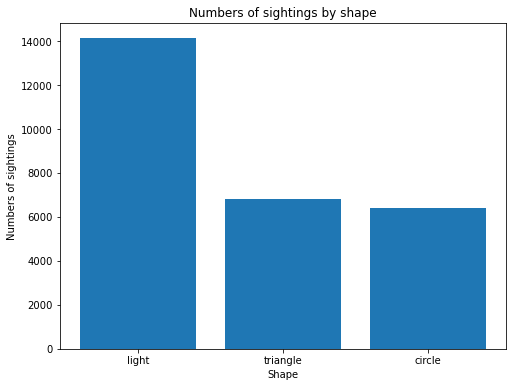

In [30]:
import pandas as pd
import matplotlib.pyplot as plt



# set figure Size
plt.figure(figsize=(8,6))

# create a bar chart
plt.bar(df_shape['shape'], df_shape['state'], label = 'state')

# set plot labels
plt.title('Numbers of sightings by shape')
plt.xlabel('Shape')
plt.ylabel('Numbers of sightings')


# display the plot
plt.show()

# Answer : Light, Triangle and circle are the most often seen shapes of UFOs

# Q.2)Take a look at data since the year 2000. How have annual sightings trended?

In [31]:
# fetehing year column from datetime feature

In [32]:
df.dtypes

datetime             datetime64[ns]
city                         object
state                        object
country                      object
shape                        object
duration(seconds)           float64
comments                     object
dateposted           datetime64[ns]
latitude                     object
longitude                   float64
duration(mintues)           float64
duration(hours)             float64
dtype: object

In [33]:
df

,datetime,city,state,country,shape,duration(seconds),comments,dateposted,latitude,longitude,duration(mintues),duration(hours)
0,1949-10-10,san marcos,tx,us,cylinder,2700.0,This event took place in early fall around 194...,2004-04-27,29.8830556,-97.941111,45.00,0.75
3,1956-10-10,edna,tx,us,circle,20.0,My older brother and twin sister were leaving ...,2004-01-17,28.9783333,-96.645833,0.33,0.01
4,1960-10-10,kaneohe,hi,us,light,900.0,AS a Marine 1st Lt. flying an FJ4B fighter/att...,2004-01-22,21.4180556,-157.803611,15.00,0.25
5,1961-10-10,bristol,tn,us,sphere,300.0,My father is now 89 my brother 52 the girl wit...,2007-04-27,36.5950000,-82.188889,5.00,0.08
7,1965-10-10,norwalk,ct,us,disk,1200.0,A bright orange color changing to reddish colo...,1999-10-02,41.1175000,-73.408333,20.00,0.33
...,...,...,...,...,...,...,...,...,...,...,...,...
80327,2013-09-09,nashville,tn,us,light,600.0,Round from the distance/slowly changing colors...,2013-09-30,36.1658333,-86.784444,10.00,0.17
80328,2013-09-09,boise,id,us,circle,1200.0,Boise&#44 ID&#44 spherical&#44 20 min&#44 10 r...,2013-09-30,43.6136111,-116.202500,20.00,0.33
80329,2013-09-09,napa,ca,us,other,1200.0,Napa UFO&#44,2013-09-30,38.2972222,-122.284444,20.00,0.33
80330,2013-09-09,vienna,va,us,circle,5.0,Saw a five gold lit cicular craft moving fastl...,2013-09-30,38.9011111,-77.265556,0.08,0.00


In [34]:
df['year'] = df['datetime'].dt.year

In [35]:
df

,datetime,city,state,country,shape,duration(seconds),comments,dateposted,latitude,longitude,duration(mintues),duration(hours),year
0,1949-10-10,san marcos,tx,us,cylinder,2700.0,This event took place in early fall around 194...,2004-04-27,29.8830556,-97.941111,45.00,0.75,1949
3,1956-10-10,edna,tx,us,circle,20.0,My older brother and twin sister were leaving ...,2004-01-17,28.9783333,-96.645833,0.33,0.01,1956
4,1960-10-10,kaneohe,hi,us,light,900.0,AS a Marine 1st Lt. flying an FJ4B fighter/att...,2004-01-22,21.4180556,-157.803611,15.00,0.25,1960
5,1961-10-10,bristol,tn,us,sphere,300.0,My father is now 89 my brother 52 the girl wit...,2007-04-27,36.5950000,-82.188889,5.00,0.08,1961
7,1965-10-10,norwalk,ct,us,disk,1200.0,A bright orange color changing to reddish colo...,1999-10-02,41.1175000,-73.408333,20.00,0.33,1965
...,...,...,...,...,...,...,...,...,...,...,...,...,...
80327,2013-09-09,nashville,tn,us,light,600.0,Round from the distance/slowly changing colors...,2013-09-30,36.1658333,-86.784444,10.00,0.17,2013
80328,2013-09-09,boise,id,us,circle,1200.0,Boise&#44 ID&#44 spherical&#44 20 min&#44 10 r...,2013-09-30,43.6136111,-116.202500,20.00,0.33,2013
80329,2013-09-09,napa,ca,us,other,1200.0,Napa UFO&#44,2013-09-30,38.2972222,-122.284444,20.00,0.33,2013
80330,2013-09-09,vienna,va,us,circle,5.0,Saw a five gold lit cicular craft moving fastl...,2013-09-30,38.9011111,-77.265556,0.08,0.00,2013


In [36]:
dfgrouped2 = df.groupby('year', as_index=False).count()[['year', 'city', 'state']]
dfgrouped2 = dfgrouped2.sort_values('year')

In [37]:
dfgrouped2 = dfgrouped2[dfgrouped2['year']>2000]
dfgrouped2.reset_index()

,index,year,city,state
0,69,2001,2548,2548
1,70,2002,2564,2564
2,71,2003,3209,3209
3,72,2004,3466,3466
4,73,2005,3374,3374
5,74,2006,3001,3001
6,75,2007,3604,3604
7,76,2008,4089,4089
8,77,2009,3743,3743
9,78,2010,3645,3645


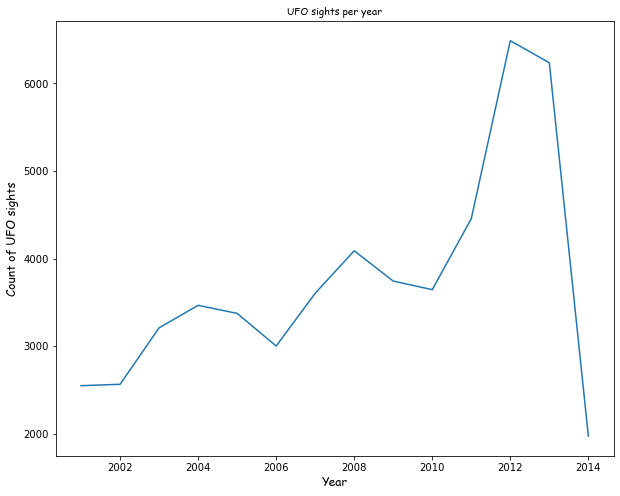

In [39]:
# set the figurr size
plt.figure(figsize=(10,8))
plt.title('UFO sights per year',{'fontname' : 'Comic Sans MS', 'fontsize' : 10})
plt.xlabel('Year',{'fontname' : 'Comic Sans MS', 'fontsize' : 12})
plt.ylabel('Count of UFO sights',{'fontname' : 'Comic Sans MS', 'fontsize' : 12})

plt.plot(dfgrouped2['year'], dfgrouped2['city'])# plot the  chart
plt.show()

# Answer: Annual sightings are increasing in number  from 2002 with small decrease in 2006 and 2010 and a huge drop in 2014

# Q.3)Dig into the US data. Which states report the most UFO sightings? 

In [40]:
df

,datetime,city,state,country,shape,duration(seconds),comments,dateposted,latitude,longitude,duration(mintues),duration(hours),year
0,1949-10-10,san marcos,tx,us,cylinder,2700.0,This event took place in early fall around 194...,2004-04-27,29.8830556,-97.941111,45.00,0.75,1949
3,1956-10-10,edna,tx,us,circle,20.0,My older brother and twin sister were leaving ...,2004-01-17,28.9783333,-96.645833,0.33,0.01,1956
4,1960-10-10,kaneohe,hi,us,light,900.0,AS a Marine 1st Lt. flying an FJ4B fighter/att...,2004-01-22,21.4180556,-157.803611,15.00,0.25,1960
5,1961-10-10,bristol,tn,us,sphere,300.0,My father is now 89 my brother 52 the girl wit...,2007-04-27,36.5950000,-82.188889,5.00,0.08,1961
7,1965-10-10,norwalk,ct,us,disk,1200.0,A bright orange color changing to reddish colo...,1999-10-02,41.1175000,-73.408333,20.00,0.33,1965
...,...,...,...,...,...,...,...,...,...,...,...,...,...
80327,2013-09-09,nashville,tn,us,light,600.0,Round from the distance/slowly changing colors...,2013-09-30,36.1658333,-86.784444,10.00,0.17,2013
80328,2013-09-09,boise,id,us,circle,1200.0,Boise&#44 ID&#44 spherical&#44 20 min&#44 10 r...,2013-09-30,43.6136111,-116.202500,20.00,0.33,2013
80329,2013-09-09,napa,ca,us,other,1200.0,Napa UFO&#44,2013-09-30,38.2972222,-122.284444,20.00,0.33,2013
80330,2013-09-09,vienna,va,us,circle,5.0,Saw a five gold lit cicular craft moving fastl...,2013-09-30,38.9011111,-77.265556,0.08,0.00,2013


In [41]:
df_grouped = df[df['country']=='us'].groupby('state').count()[['city', 'shape']]

In [42]:
df_grouped.sort_values('city', ascending=False).head(5)

,city,shape
state,,
ca,8683,8683
fl,3754,3754
wa,3707,3707
tx,3398,3398
ny,2915,2915


# Answer: california, Florida, Washington, Texas, New york has reported the most UFO sightings

# Q.4)Create a histogram to understand the distribution of the duration of UFO sightings

<AxesSubplot:ylabel='duration(seconds)'>

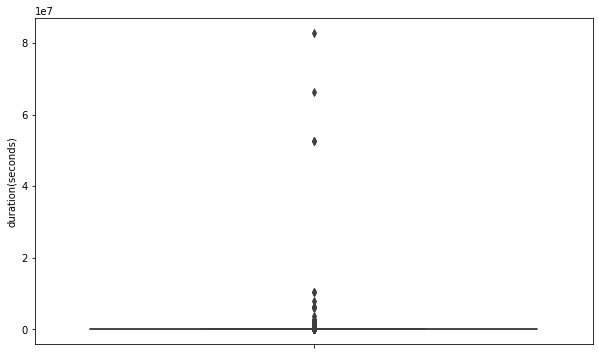

In [43]:
plt.figure(figsize=(10,6))
sns.boxplot(y=df['duration(seconds)'])

In [46]:
# Removing Outliers using IQR method
q1 = df['duration(seconds)'].quantile(0.25)
q3 = df['duration(seconds)'].quantile(0.75)
IQR = q3-q1

df_no_out = df[(df['duration(seconds)']>q1-1.5*IQR) & (df['duration(seconds)']<q3+1.5*IQR)]

<AxesSubplot:ylabel='duration(seconds)'>

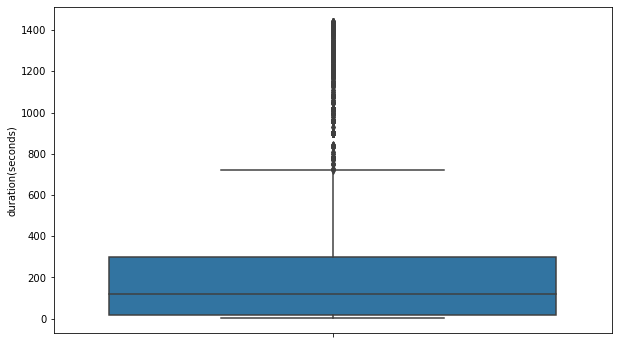

In [47]:
plt.figure(figsize=(10,6))
sns.boxplot(y=df_no_out['duration(seconds)'])

# Answer: Distribution of the duration of UFO sighting using Histogram

<AxesSubplot:xlabel='duration(seconds)', ylabel='Count'>

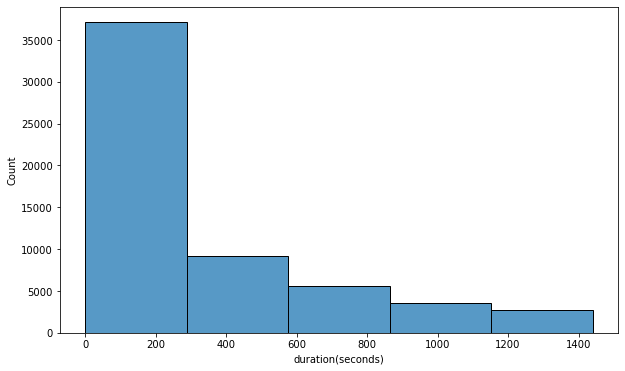

In [49]:
plt.figure(figsize=(10,6))
sns.histplot(df_no_out['duration(seconds)'], bins =5)

# Q.5) In which country most of the UFOs were seen?

In [50]:
df['count'] =1

In [52]:
df_grouped = df.groupby('country').count()

In [53]:
df_grouped.sort_values('count', ascending=False)

,datetime,city,state,shape,duration(seconds),comments,dateposted,latitude,longitude,duration(mintues),duration(hours),year,count
country,,,,,,,,,,,,,
us,63553,63553,63553,63553,63553,63553,63553,63553,63553,63553,63553,63553,63553
ca,2942,2942,2942,2942,2942,2942,2942,2942,2942,2942,2942,2942,2942
gb,11,11,11,11,11,11,11,11,11,11,11,11,11
au,10,10,10,10,10,10,10,10,10,10,10,10,10


# Answer : US

# Q.6) what kind of shapes did the UFOs had?

In [55]:
print(df['shape'].unique())

['cylinder' 'circle' 'light' 'sphere' 'disk' 'fireball' 'unknown' 'oval'
 'other' 'rectangle' 'chevron' 'formation' 'triangle' 'cigar' 'delta'
 'changing' 'egg' 'diamond' 'flash' 'teardrop' 'cone' 'cross' 'pyramid'
 'round' 'flare' 'hexagon' 'crescent' 'changed']


# Q.7) How many UFOs had unknown shapes?

In [56]:
print(df[df['shape'] == 'unknown'].groupby('shape').count()['count'])

shape
unknown    4774
Name: count, dtype: int64


# Answer: 4774 UFOs had unknown shapes

# Q.8) Which year had the most UFOs sight?

In [57]:
df.dtypes

datetime             datetime64[ns]
city                         object
state                        object
country                      object
shape                        object
duration(seconds)           float64
comments                     object
dateposted           datetime64[ns]
latitude                     object
longitude                   float64
duration(mintues)           float64
duration(hours)             float64
year                          int64
count                         int64
dtype: object

In [58]:
df['year'] = df['datetime'].dt.year

In [59]:
df

,datetime,city,state,country,shape,duration(seconds),comments,dateposted,latitude,longitude,duration(mintues),duration(hours),year,count
0,1949-10-10,san marcos,tx,us,cylinder,2700.0,This event took place in early fall around 194...,2004-04-27,29.8830556,-97.941111,45.00,0.75,1949,1
3,1956-10-10,edna,tx,us,circle,20.0,My older brother and twin sister were leaving ...,2004-01-17,28.9783333,-96.645833,0.33,0.01,1956,1
4,1960-10-10,kaneohe,hi,us,light,900.0,AS a Marine 1st Lt. flying an FJ4B fighter/att...,2004-01-22,21.4180556,-157.803611,15.00,0.25,1960,1
5,1961-10-10,bristol,tn,us,sphere,300.0,My father is now 89 my brother 52 the girl wit...,2007-04-27,36.5950000,-82.188889,5.00,0.08,1961,1
7,1965-10-10,norwalk,ct,us,disk,1200.0,A bright orange color changing to reddish colo...,1999-10-02,41.1175000,-73.408333,20.00,0.33,1965,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80327,2013-09-09,nashville,tn,us,light,600.0,Round from the distance/slowly changing colors...,2013-09-30,36.1658333,-86.784444,10.00,0.17,2013,1
80328,2013-09-09,boise,id,us,circle,1200.0,Boise&#44 ID&#44 spherical&#44 20 min&#44 10 r...,2013-09-30,43.6136111,-116.202500,20.00,0.33,2013,1
80329,2013-09-09,napa,ca,us,other,1200.0,Napa UFO&#44,2013-09-30,38.2972222,-122.284444,20.00,0.33,2013,1
80330,2013-09-09,vienna,va,us,circle,5.0,Saw a five gold lit cicular craft moving fastl...,2013-09-30,38.9011111,-77.265556,0.08,0.00,2013,1


In [60]:
df.head()

,datetime,city,state,country,shape,duration(seconds),comments,dateposted,latitude,longitude,duration(mintues),duration(hours),year,count
0,1949-10-10,san marcos,tx,us,cylinder,2700.0,This event took place in early fall around 194...,2004-04-27,29.8830556,-97.941111,45.00,0.75,1949,1
3,1956-10-10,edna,tx,us,circle,20.0,My older brother and twin sister were leaving ...,2004-01-17,28.9783333,-96.645833,0.33,0.01,1956,1
4,1960-10-10,kaneohe,hi,us,light,900.0,AS a Marine 1st Lt. flying an FJ4B fighter/att...,2004-01-22,21.4180556,-157.803611,15.00,0.25,1960,1
5,1961-10-10,bristol,tn,us,sphere,300.0,My father is now 89 my brother 52 the girl wit...,2007-04-27,36.5950000,-82.188889,5.00,0.08,1961,1
7,1965-10-10,norwalk,ct,us,disk,1200.0,A bright orange color changing to reddish colo...,1999-10-02,41.1175000,-73.408333,20.00,0.33,1965,1


In [61]:
dfgrouped_year = df.groupby('year', as_index= False).count()[['year', 'count']]

In [62]:
dfgrouped_year.sort_values('count', ascending= False)

,year,count
80,2012,6489
81,2013,6237
79,2011,4456
76,2008,4089
77,2009,3743
...,...,...
5,1934,1
1,1920,1
3,1929,1
2,1925,1


# Answer: Year 2012 had the most UFOs sights with 6489 total sights